In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 51                               
x_start, x_end = -1.0, 2.0            
y_start, y_end = -0.5, 0.5            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)

In [3]:
sigmas = numpy.loadtxt("NACA0012_sigma.txt")
xs = numpy.loadtxt("NACA0012_x.txt")
ys = numpy.loadtxt("NACA0012_y.txt")

In [4]:
u_inf = 1.0       
u_freestream = u_inf * numpy.ones((N, N))
v_freestream = numpy.zeros((N, N))
psi_freestream = u_inf * Y

In [5]:
u_source_sum = 0
v_source_sum = 0
psi_source_sum = 0

In [6]:
for i in range(len(sigmas)):
    strength_source = sigmas[i]
    x_source = xs[i]
    y_source = ys[i]
    u_source = (strength_source / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
    v_source = (strength_source / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))
    psi_source = strength_source / (2 * numpy.pi) * numpy.arctan2((Y - y_source), (X - x_source))
    u_source_sum = u_source_sum + u_source
    v_source_sum = v_source_sum + v_source
    psi_source_sum = psi_source_sum + psi_source

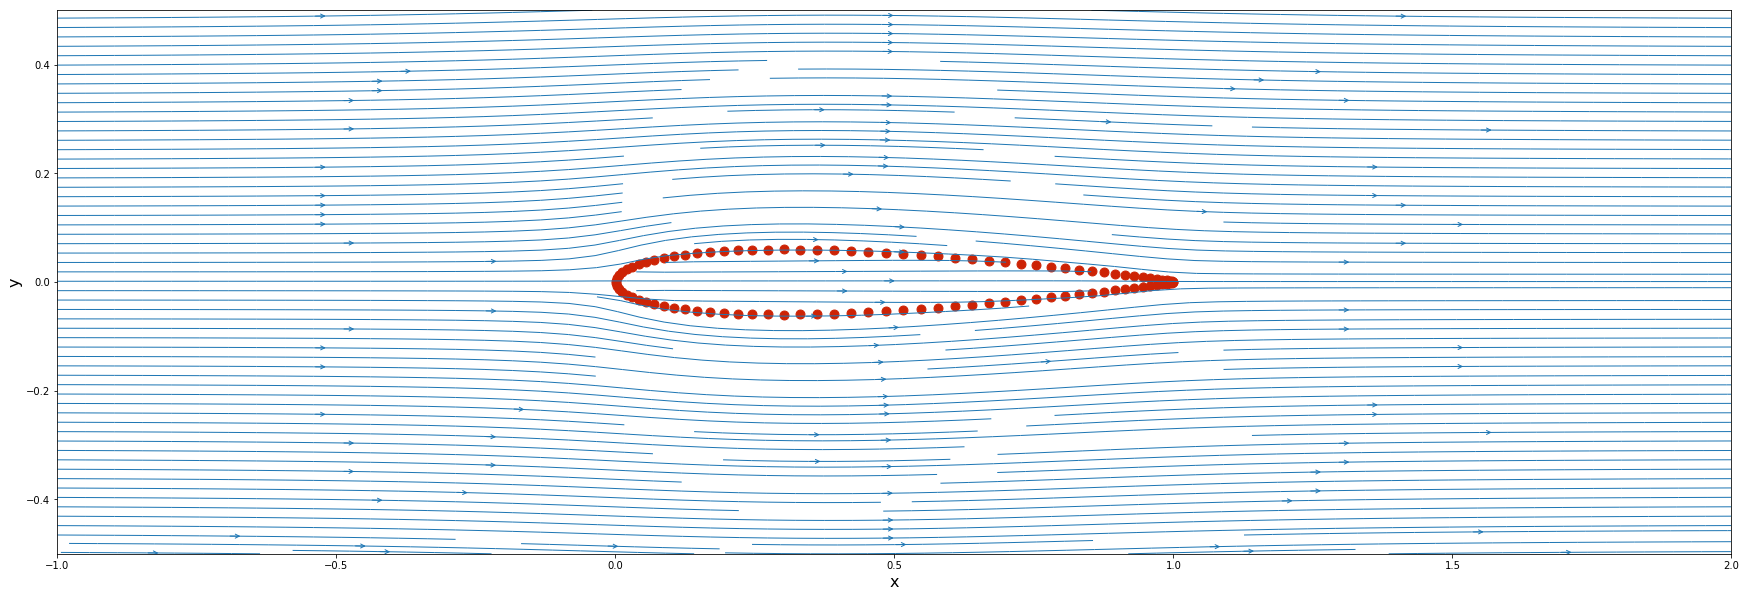

In [7]:
u = u_freestream + u_source_sum
v = v_freestream + v_source_sum
psi = psi_freestream + psi_source_sum

width = 30.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')


for i in range(len(sigmas)):
    x_source = xs[i]
    y_source = ys[i]
    pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

In [8]:
cp = 1.0 - (u**2 + v**2) / u_inf**2

In [9]:
ind = numpy.unravel_index(numpy.argmax(cp, axis=None), cp.shape)

In [10]:
cp[ind]

0.47144366133162408

In [11]:
ind

(25, 16)

In [18]:
cp[26]

array([ 0.01656622,  0.01818059,  0.02005182,  0.02223913,  0.02482042,
        0.02789987,  0.03161986,  0.03617955,  0.04186557,  0.04910459,
        0.05855849,  0.07130834,  0.0892413 ,  0.11595828,  0.15924585,
        0.23935853,  0.42131923, -0.37385684, -0.47287549, -0.43283264,
       -0.39771962, -0.36384034, -0.32995017, -0.29639624, -0.26348722,
       -0.23075329, -0.1987319 , -0.16596927, -0.13236684, -0.10163609,
       -0.11926907,  0.08170331,  0.06512159,  0.14676014,  0.16859025,
        0.10875832,  0.08004116,  0.06279235,  0.05116753,  0.04278334,
        0.03645721,  0.03152606,  0.02758587,  0.02437511,  0.02171651,
        0.01948548,  0.01759186,  0.01596876,  0.01456556,  0.01334323,
        0.01227126])

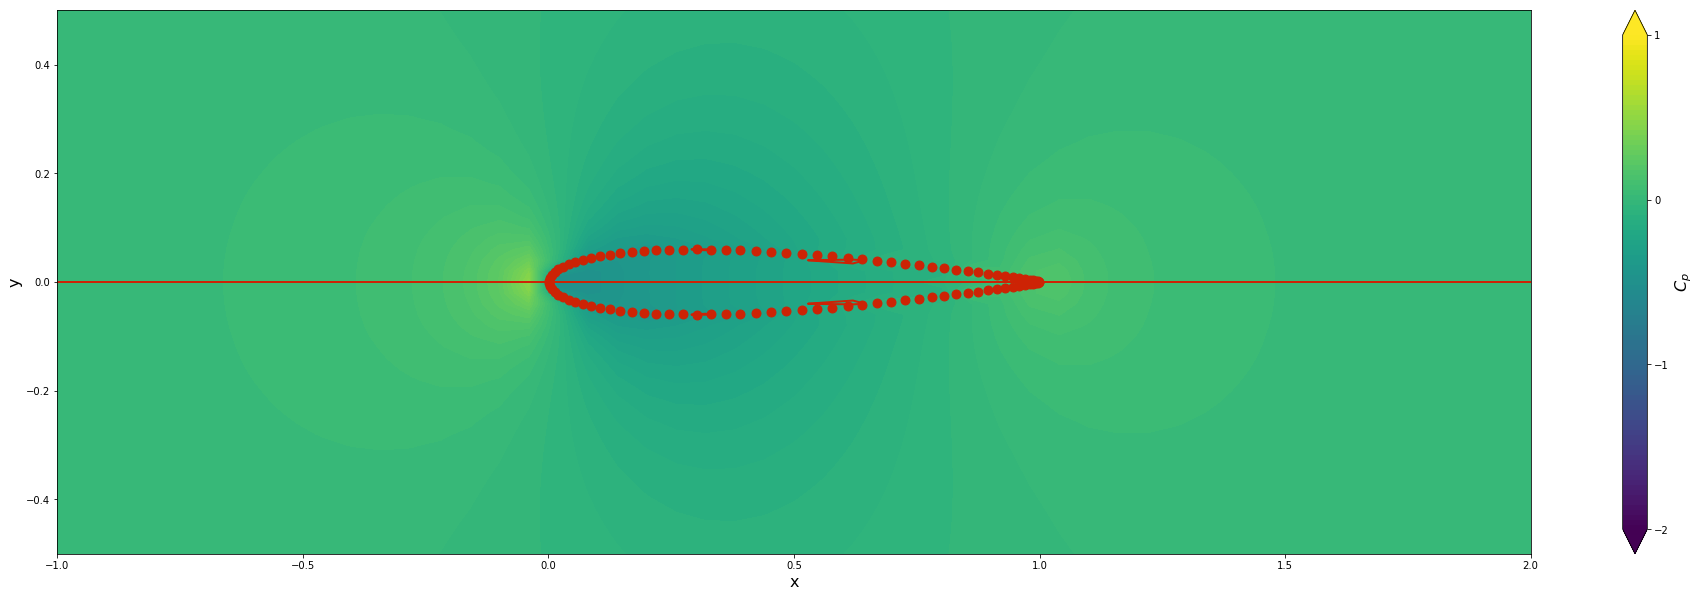

In [13]:
cp = 1.0 - (u**2 + v**2) / u_inf**2


width = 30
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

for i in range(len(sigmas)):
    x_source = xs[i]
    y_source = ys[i]
    pyplot.scatter(x_source, y_source,
                   color='#CD2305', s=80, marker='o')